Combining multiple spectra - `MultiSpectraRandomWaves` Class
====================================================

This class is derived from RandomWaves class and it can be used for combining multiple wave spectra. It uses linear reconstruction for calculating the waves (see RandomWaves notebook)


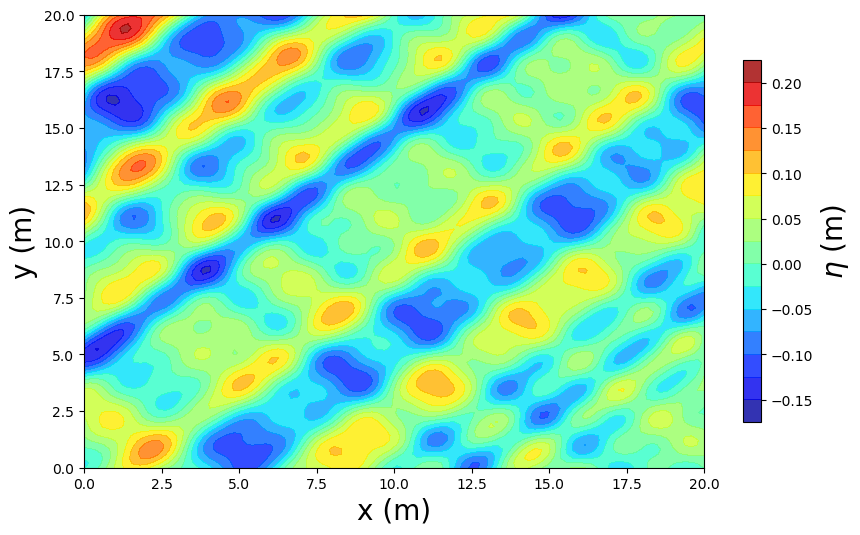

In [1]:

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sys
#Append path of local proteus installation
sys.path.append("C:/Users/present/Desktop/proteus/")
#The notebook will work with the following commit:
#https://github.com/erdc-cm/proteus/commit/9bb34b3563b5ddab6cb1dd9f75173da2710d2a41
from proteus import Profiling,SpatialTools
#import imp
#WT = imp.load_source('WaveTools', 'WaveTools.pyx')
from proteus import WaveTools as WT


#Setting up wave properties
Nspectra = 2
Tp = [2., 2.]
Hs = [0.15, 0.3]
depth = 1.
mwl = 0.
g = np.array([0., 0., -9.81])
N = [101, 101]
bandFactor = [2, 2]
spectName = ["JONSWAP", "JONSWAP"]
spectral_params = [None, None]
phi = [None, None]
waveDir = [ [1., 1., 0.], [-1, 1., 0.] ]


#Calling the class
MS = WT.MultiSpectraRandomWaves(Nspectra,
                             Tp,
                             Hs,
                             mwl,
                             depth,
                             waveDir,
                             g,
                             N,
                             bandFactor,
                             spectName,
                             spectral_params,
                             phi
                             )

#Setting up the plan view area
n = 100
xi = np.linspace(0, 20, n)
yi=np.linspace(0, 20, n)

eta_t = np.zeros((n, n),)

#Calculating the free surface elevation calculated from MWL using a 2D plane
for i in range(len(xi)):
    for j in range(len(yi)):
        x = [xi[i], xi[j], 0]
        eta_t[i, j] = MS.eta(x, 0.)

psize=20        
#Plotting the contour 
plt.figure(1, figsize=(10,6), dpi=100)
X, Y = np.meshgrid(xi, yi)
CS = plt.contourf(X,Y,eta_t, 16, alpha=0.8, cmap='jet')
plt.xlabel("x (m)", size=psize)
plt.ylabel("y (m)", size=psize)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("$\eta$ (m)", size = psize)
plt.show()



